In [8]:
import pyabc
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from study_abc_noise.model.conversion_reaction import *

mv = ConversionReaction1dModelVars()

## Concept

Normalization: 45879586984.61828


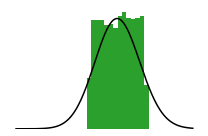

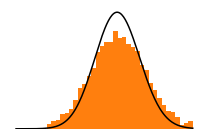

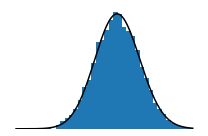

In [9]:
db_files = ["h_incorrect.db", "h_noisymodel.db", "h_stochasticacceptor.db"]
hs = [pyabc.History(f"sqlite:///{f}") for f in db_files]

labels = ['No noise considered', 'Noisy model', 'Stochastic acceptor']
ids = ["incorrect", "noisymodel", "stochasticacceptor"]
colors = ['C2', 'C1', 'C0']
ts = [3, 8, None]
# find correct values
_, data = pickle.load(open("data.dat", 'rb'))
posterior_scaled = get_posterior_scaled_1d(mv, data)
xs = np.linspace(mv.limits['p0'][0], mv.limits['p0'][1], 200)
true_vals = [posterior_scaled([x]) for x in xs]

color_truth = 'k'

for h, t, id_, c in zip(hs, ts, ids, colors):
    ax = pyabc.visualization.plot_histogram_1d(
        h, 'p0', t=t, xmin=mv.limits['p0'][0], xmax=mv.limits['p0'][1],
        size=(3, 2), bins=40, color=c)
    ax.plot(xs, true_vals, color=color_truth)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(None)
    plt.axis('off')
    plt.tight_layout()
    for fmt in ['png', 'svg']:
        plt.savefig(f"hist_{id_}.{fmt}", format=f'{fmt}')

## Motivation

### Optimize

In [10]:
from study_abc_noise.optimize import multistart_on_kernel

# optimize
result = multistart_on_kernel(mv, data)

kernel_l1 = pyabc.distance.IndependentLaplaceKernel(
    mv.noise_std * np.ones(mv.n_t))

result_l1 = multistart_on_kernel(mv, data, kernel_l1)

# l2
optimal_parameter = result.optimize_result.get_for_key('x')[0]
optimal_value = result.optimize_result.get_for_key('fval')[0]
print("optimal parameter l2: ", optimal_parameter)
print("optimal value l2: ", optimal_value)

distance_value = 2 * (optimal_value - 0.5 * (mv.n_t * np.log(2 * np.pi * mv.noise_std**2)))
print("optimal distance l2: ", distance_value)

# l1

optimal_parameter_l1 = result_l1.optimize_result.get_for_key('x')[0]
optimal_value_l1 = result_l1.optimize_result.get_for_key('fval')[0]
print("optimal parameter l1: ", optimal_parameter_l1)
print("optimal value l1: ", optimal_value_l1)

distance_value_l1 = (optimal_value_l1 - (mv.n_t * np.log(2 *  mv.noise_std)))
print("optimal distance l1: ", distance_value_l1)

INFO:pypesto.engine.task:Executing task 0.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0146s, n_fval=10.
INFO:pypesto.engine.task:Executing task 1.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0094s, n_fval=10.
INFO:pypesto.engine.task:Executing task 2.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0245s, n_fval=28.
INFO:pypesto.engine.task:Executing task 3.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0081s, n_fval=10.
INFO:pypesto.engine.task:Executing task 4.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0511s, n_fval=88.
INFO:pypesto.engine.task:Executing task 5.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0115s, n_fval=12.
INFO:pypesto.engine.task:Executing task 6.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0072s, n_fval=10.
INFO:pypesto.engine.task:Executing task 7.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0107s, n_fval=12.
INFO:pypesto.engine.task:Executi

INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0057s, n_fval=10.
INFO:pypesto.engine.task:Executing task 68.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0092s, n_fval=12.
INFO:pypesto.engine.task:Executing task 69.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0281s, n_fval=30.
INFO:pypesto.engine.task:Executing task 70.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0163s, n_fval=10.
INFO:pypesto.engine.task:Executing task 71.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0240s, n_fval=28.
INFO:pypesto.engine.task:Executing task 72.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0222s, n_fval=32.
INFO:pypesto.engine.task:Executing task 73.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0093s, n_fval=10.
INFO:pypesto.engine.task:Executing task 74.
INFO:pypesto.optimize.optimizer:Final fval=-27.3186, time=0.0847s, n_fval=92.
INFO:pypesto.engine.task:Executing task 75.
INFO:pypesto.optimize.op

INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0398s, n_fval=138.
INFO:pypesto.engine.task:Executing task 35.
INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0270s, n_fval=96.
INFO:pypesto.engine.task:Executing task 36.
INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0396s, n_fval=122.
INFO:pypesto.engine.task:Executing task 37.
INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0410s, n_fval=146.
INFO:pypesto.engine.task:Executing task 38.
INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0399s, n_fval=124.
INFO:pypesto.engine.task:Executing task 39.
INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0414s, n_fval=136.
INFO:pypesto.engine.task:Executing task 40.
INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0411s, n_fval=140.
INFO:pypesto.engine.task:Executing task 41.
INFO:pypesto.optimize.optimizer:Final fval=-25.3094, time=0.0324s, n_fval=104.
INFO:pypesto.engine.task:Executing task 42.
INFO:pypesto.opti

optimal parameter l2:  [0.06043461]
optimal value l2:  -27.31855529580429
optimal distance l2:  5.22457885286088
optimal parameter l1:  [0.05871786]
optimal value l1:  -25.309442595816723
optimal distance l1:  6.879315652865284


### Plot

Normalization: 45879586984.61828


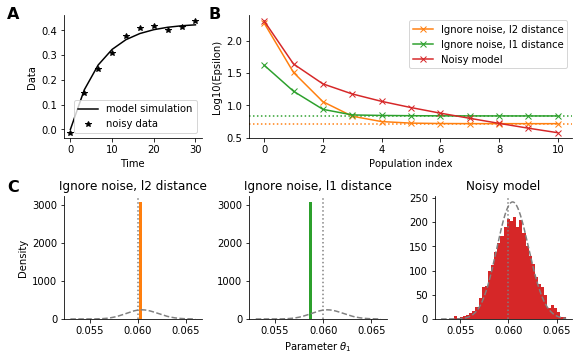

In [11]:
db_files = ["h_incorrect.db", "h_incorrect_l1.db", "h_noisymodel.db"]
hs = [pyabc.History(f"sqlite:///{f}") for f in db_files]

labels = ['Ignore noise, l2 distance', 
          'Ignore noise, l1 distance',
          'Noisy model']

ax_data = plt.subplot2grid((2, 3), (0, 0))
ax_epsilons = plt.subplot2grid((2, 3), (0, 1), colspan=2)
axes_h = [plt.subplot2grid((2, 3), (1, i)) for i in [0, 1, 2]]
color_truth = 'grey'
colors_h = ['C1', 'C2', 'C3']

# plot epsilons
ax_epsilons.axhline(np.log10(distance_value), linestyle='dotted', color='C1')
ax_epsilons.axhline(np.log10(distance_value_l1), linestyle='dotted', color='C2')
ax_epsilons.spines['right'].set_visible(False)
ax_epsilons.spines['top'].set_visible(False)
pyabc.visualization.plot_epsilons(hs, labels, scale='log10', size=(9, 6), colors=colors_h, ax=ax_epsilons)
ax_epsilons.set_title(None)

# data
data_nonoise, data = pickle.load(open("data.dat", 'rb'))

ax_data.plot(mv.get_ts(), data_nonoise['y'], '-', color='black', label='model simulation')
ax_data.plot(mv.get_ts(), data['y'], '*', color='black', label='noisy data')
ax_data.legend()
ax_data.set_xlabel("Time")
ax_data.set_ylabel("Data")
#ax_data.set_title("Model values")
ax_data.spines['right'].set_visible(False)
ax_data.spines['top'].set_visible(False)

# find correct values
posterior_scaled = get_posterior_scaled_1d(mv, data)
xs = np.linspace(mv.limits['p0'][0], mv.limits['p0'][1], 200)
true_vals = [posterior_scaled([x]) for x in xs]

# plot histories
for i, (h, label, color) in enumerate(zip(hs, labels, colors_h)):
    pyabc.visualization.plot_histogram_1d(
        h, 'p0', xmin=mv.limits['p0'][0], xmax=mv.limits['p0'][1],
        size=(3, 2), bins=40, ax=axes_h[i], color=color, refval={'p0': 0.06}, refval_color='grey')
    axes_h[i].plot(xs, true_vals, color=color_truth, linestyle='--', label="True posterior")
    axes_h[i].set_title(label)
    axes_h[i].set_xlabel("")
    axes_h[i].spines['right'].set_visible(False)
    axes_h[i].spines['top'].set_visible(False)

axes_h[1].set_xlabel("Parameter $\\theta_1$")
axes_h[0].set_ylabel("Density")

# create legend for hists
#lines = [Line2D([0], [0], color=color_truth, linestyle='--'), Line2D([0], [0], color='grey', linestyle='dotted')]
#axes_h[0].legend(lines, ["True posterior", "True parameter"])

# add identifiers
plt.figtext(0.0, 0.96, "A", size=16, weight='bold')
plt.figtext(0.35, 0.96, "B", size=16, weight='bold')
plt.figtext(0.0, 0.48, "C", size=16, weight='bold')

# finalize layout
plt.gcf().set_size_inches((8, 5))
plt.gcf().tight_layout()

# save
plt.savefig("motivation_data.png", format='png')
plt.savefig("motivation_data.eps", format='eps')
plt.savefig("motivation_data.svg", format='svg')

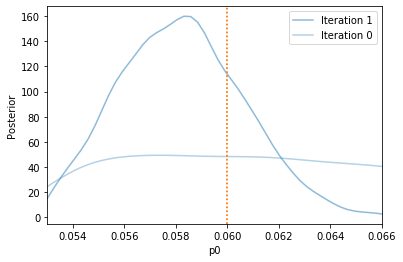

In [5]:
h = pyabc.History("sqlite:///h_stochasticacceptor.db")
_, ax = plt.subplots()
for t in reversed(range(0, h.max_t)):
    pyabc.visualization.plot_kde_1d_highlevel(
        h, t=t, x='p0', xmin=mv.limits['p0'][0], xmax=mv.limits['p0'][1],
        refval = mv.p_true, ax=ax, color='C0', alpha=1/(h.max_t-t+1), label=f"Iteration {t}")
ax.legend()